In [131]:
from __future__ import division
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import numpy as np

from difflib import SequenceMatcher

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

In [2]:
df=pd.read_csv('fda.csv')
df.head()

,primaryid,drug_seq,caseid,indi_pt,drugname,age,gndr_cod,wt,reporter_country,de,lt,ho,ds,ca,ri,ot,pt
0,100033001,1,10003300.0,osteoporosis,boniva,77.0,f,NaN,us,NaN,NaN,NaN,disability,NaN,NaN,NaN,arthralgia
1,100033001,1,10003300.0,osteoporosis,boniva,77.0,f,NaN,us,NaN,NaN,NaN,disability,NaN,NaN,NaN,headache
2,100033061,1,10003306.0,product used for unknown indication,NaN,68.0,f,NaN,us,NaN,NaN,NaN,NaN,NaN,NaN,NaN,cough
3,100033062,1,10003306.0,product used for unknown indication,letairis,68.0,f,NaN,us,NaN,NaN,NaN,NaN,NaN,NaN,NaN,cough
4,100033072,2,10003307.0,connective tissue disorder,letairis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,rhinorrhoea


In [3]:
df.loc[df['de'].isnull(), 'de']=0
df.loc[df['de']=='death', 'de']=1
df.loc[df['pt']=='death', 'de']=1
df['de']=df['de'].apply(pd.to_numeric)

df.loc[df['lt'].isnull(), 'lt']=0
df.loc[df['lt']=='life_threat', 'lt']=1
df['lt']=df['lt'].apply(pd.to_numeric)

df.loc[df['ho'].isnull(), 'ho']=0
df.loc[df['ho']=='hospitalization', 'ho']=1
df['ho']=df['ho'].apply(pd.to_numeric)

df.loc[df['ds'].isnull(), 'ds']=0
df.loc[df['ds']=='disability', 'ds']=1
df['ds']=df['ds'].apply(pd.to_numeric)

df.loc[df['ca'].isnull(), 'ca']=0
df.loc[df['ca']=='congenital_anomaly', 'ca']=1
df['ca']=df['ca'].apply(pd.to_numeric)

df.loc[df['ri'].isnull(), 'ri']=0
df.loc[df['ri']=='required_intervention', 'ri']=1
df['ri']=df['ri'].apply(pd.to_numeric)

df.loc[df['ot'].isnull(), 'ot']=0
df.loc[df['ot']=='other_serious', 'ot']=1
df['ot']=df['ot'].apply(pd.to_numeric)

df.loc[df['pt']=='death', 'pt']=None
df.loc[df['pt'].isnull(), 'pt']='no reaction'

In [4]:
df['gndr_cod']=df['gndr_cod'].str.replace('f','0')
df['gndr_cod']=df['gndr_cod'].str.replace('m','1')
df['gndr_cod']=df['gndr_cod'].apply(pd.to_numeric)

In [5]:
df['reporter_country']=df['reporter_country'].str.replace('united states','us')
df['reporter_country']=df['reporter_country'].str.replace('japan','jp')
df['reporter_country']=df['reporter_country'].str.replace('canada','ca')
df['reporter_country']=df['reporter_country'].str.replace('france','fr')
df['reporter_country']=df['reporter_country'].str.replace('australia','au')
df['reporter_country']=df['reporter_country'].str.replace('brazil','br')
df['reporter_country']=df['reporter_country'].str.replace('united kingdom','gb')

In [6]:
df.loc[df['age']>150, 'age']=None
df.loc[df['age']<0, 'age']=None
df.loc[df['wt']>500, 'wt']=None
df.loc[df['wt']<0, 'wt']=None

In [7]:
df.wt.max()

486.0

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21349480 entries, 0 to 21349479
Data columns (total 17 columns):
primaryid           int64
drug_seq            int64
caseid              float64
indi_pt             object
drugname            object
age                 float64
gndr_cod            float64
wt                  float64
reporter_country    object
de                  int64
lt                  int64
ho                  int64
ds                  int64
ca                  int64
ri                  int64
ot                  int64
pt                  object
dtypes: float64(4), int64(9), object(4)
memory usage: 2.7+ GB


In [9]:
df.to_csv('fda2.csv', index=False)

In [2]:
df=pd.read_csv('fda2.csv')
df.head()

,primaryid,drug_seq,caseid,indi_pt,drugname,age,gndr_cod,wt,reporter_country,de,lt,ho,ds,ca,ri,ot,pt
0,100033001,1,10003300.0,osteoporosis,boniva,77.0,0.0,NaN,us,0,0,0,1,0,0,0,arthralgia
1,100033001,1,10003300.0,osteoporosis,boniva,77.0,0.0,NaN,us,0,0,0,1,0,0,0,headache
2,100033061,1,10003306.0,product used for unknown indication,NaN,68.0,0.0,NaN,us,0,0,0,0,0,0,0,cough
3,100033062,1,10003306.0,product used for unknown indication,letairis,68.0,0.0,NaN,us,0,0,0,0,0,0,0,cough
4,100033072,2,10003307.0,connective tissue disorder,letairis,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,rhinorrhoea


In [9]:
df.groupby(['gndr_cod']).mean()

,primaryid,drug_seq,caseid,age,wt,de,lt,ho,ds,ca,ri,ot
gndr_cod,,,,,,,,,,,,
0.0,9.367986e+07,4.018585e+08,1.095720e+07,55.382836,71.642089,0.048409,0.027146,0.224684,0.033404,0.002279,0.002251,0.265246
1.0,8.584742e+07,4.216133e+08,1.109972e+07,56.283431,81.167607,0.089299,0.041530,0.245354,0.028637,0.003903,0.003139,0.252264


## An analyse of death caused by indications and drugs (graph limited to 100 records)

In [10]:
df_de=df[['indi_pt','drugname','de']].dropna().reset_index()
df_de=df_de.groupby(['indi_pt', 'drugname'])['de'].mean().reset_index()
len(df_de)

464284

In [11]:
df_de.head()

,indi_pt,drugname,de
0,11-beta-hydroxylase deficiency,spironolactone (unknown),0.0
1,21-hydroxylase deficiency,decadron,0.0
2,21-hydroxylase deficiency,decadron src,0.0
3,21-hydroxylase deficiency,hydrocortisone,0.0
4,21-hydroxylase deficiency,predonine,0.0


In [12]:
df_de2=df_de.sort_values(['de'] ,ascending=False).head(100)
#df_de2['de']=df_de2['de']/df_de2['de'].max()
df_de2.pivot_table(index="indi_pt", columns="drugname", values="de",fill_value=0)
#(index='foo', columns='bar', values='baz')

drugname,acyclovir.,adcal-d3 1.5 gram + 10 microgram,adcirca (tadalafil),adco-bisocor,adona (ac-17),adrenaline 4/50,adrenocortical hormone nos,aerogear asthma,afinitor,afinitor disperz,...,tobramycin.,uptravi,valgancyclovir,valproic acid.,vancomycin,vancomycin sandoz,vka,voriconazole,voriconazole.,zanamivir
indi_pt,,,,,,,,,,,,,,,,,,,,,
antiviral prophylaxis,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,1
antiviral treatment,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
candida infection,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
candida pneumonia,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
candida sepsis,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
candida serology positive,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
candida test positive,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
candidiasis,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
factor v inhibition,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


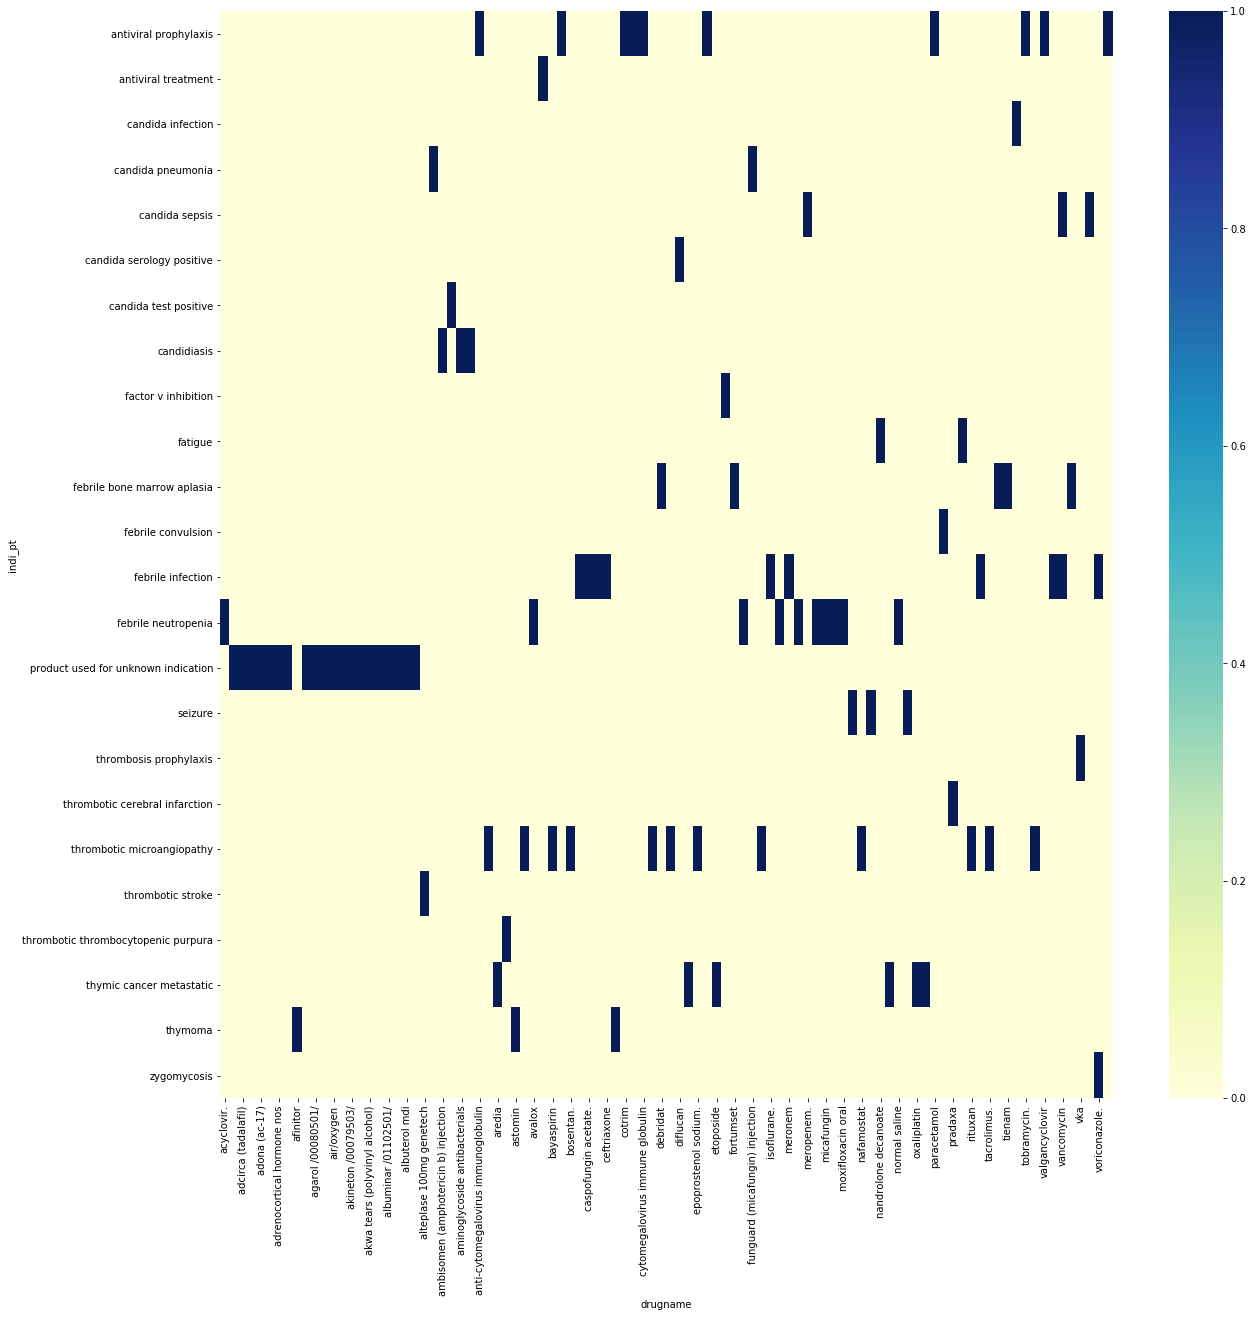

In [13]:
#de = df_de.pivot("indi_pt", "drugname", "de")
plt.figure(figsize=(20,20))
sns.heatmap(df_de2.pivot_table(index="indi_pt", columns="drugname", values="de",fill_value=0), cmap="YlGnBu")

## An analyse of all outputs caused by indications and drugs (graph limited to 100 records)

In [14]:
df2_g=df
df2_g['output']=0.0

In [15]:
df2_g.head()

,primaryid,drug_seq,caseid,indi_pt,drugname,age,gndr_cod,wt,reporter_country,de,lt,ho,ds,ca,ri,ot,pt,output
0,100033001,1,10003300.0,osteoporosis,boniva,77.0,0.0,NaN,us,0,0,0,1,0,0,0,arthralgia,0.0
1,100033001,1,10003300.0,osteoporosis,boniva,77.0,0.0,NaN,us,0,0,0,1,0,0,0,headache,0.0
2,100033061,1,10003306.0,product used for unknown indication,NaN,68.0,0.0,NaN,us,0,0,0,0,0,0,0,cough,0.0
3,100033062,1,10003306.0,product used for unknown indication,letairis,68.0,0.0,NaN,us,0,0,0,0,0,0,0,cough,0.0
4,100033072,2,10003307.0,connective tissue disorder,letairis,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,rhinorrhoea,0.0


In [16]:
ddd=df2_g[['de','lt','ho','ds','ca','ri','ot']]

In [20]:
ddd['out']=0.0
ddd.head()

,de,lt,ho,ds,ca,ri,ot,out
0,0,0,0,1,0,0,0,0.0
1,0,0,0,1,0,0,0,0.0
2,0,0,0,0,0,0,0,0.0
3,0,0,0,0,0,0,0,0.0
4,0,0,0,0,0,0,0,0.0


In [29]:
ddd[ddd['lt']==1]['ds'].unique()

array([0, 1], dtype=int64)

In [30]:
ddd.groupby(['de','lt','ho','ds','ca','ri','ot']).size().reset_index().rename(columns={0:'count'})

,de,lt,ho,ds,ca,ri,ot,count
0,0,0,0,0,0,0,0,9219167
1,0,0,0,0,0,0,1,4776265
2,0,0,0,0,0,1,0,38605
3,0,0,0,0,0,1,1,663
4,0,0,0,0,1,0,0,51168
5,0,0,0,0,1,0,1,7046
6,0,0,0,0,1,1,0,121
7,0,0,0,0,1,1,1,4
8,0,0,0,1,0,0,0,401183
9,0,0,0,1,0,0,1,158851


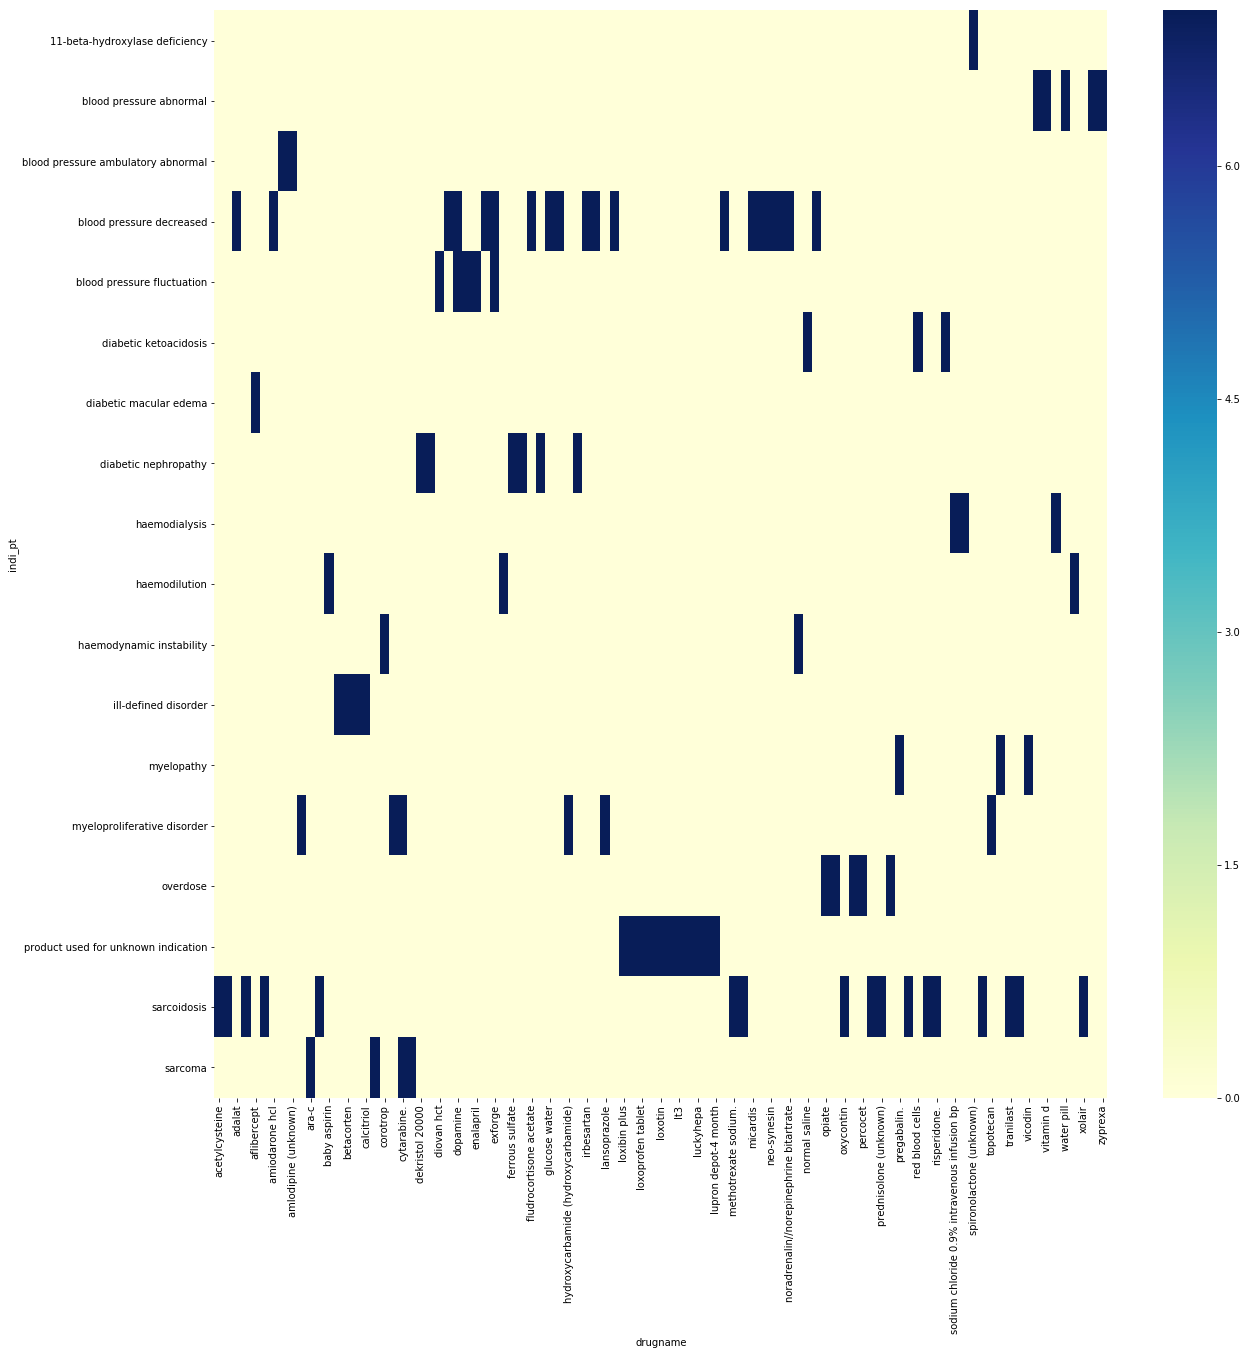

In [8]:
df2_g=df
df2_g['output']=0.0
df2_g.loc[df2_g['de']==1, 'output']=1
df2_g.loc[df2_g['lt']==1, 'output']=2
df2_g.loc[df2_g['ho']==1, 'output']=3
df2_g.loc[df2_g['ds']==1, 'output']=4
df2_g.loc[df2_g['ca']==1, 'output']=5
df2_g.loc[df2_g['ri']==1, 'output']=6
df2_g.loc[df2_g['ot']==1, 'output']=7

df_de3=df2_g[['indi_pt','drugname','output']].dropna().reset_index()
df_de3=df_de3.groupby(['indi_pt', 'drugname'])['output'].mean().reset_index()



df_de3=df_de3.sort_values(['output'] ,ascending=False).head(100)
#df_de3['output']=df_de3['output']/df_de3['output'].max()
#df_de2.pivot_table(index="indi_pt", columns="drugname", values="de",fill_value=0)



#de = df_de.pivot("indi_pt", "drugname", "de")
plt.figure(figsize=(20,20))
sns.heatmap(df_de3.pivot_table(index="indi_pt", columns="drugname", values="output",fill_value=0), cmap="YlGnBu")

## Limited model building

In [171]:
df[df['de']==1]['indi_pt'].value_counts()

product used for unknown indication          316160
drug use for unknown indication               88870
hypertension                                  28108
prophylaxis                                   25658
rheumatoid arthritis                          25305
pain                                          23781
peritoneal dialysis                           21137
multiple myeloma                              20985
breast cancer                                 16223
diabetes mellitus                             15017
pulmonary arterial hypertension               14949
hiv infection                                 14202
plasma cell myeloma                           13959
depression                                    13190
osteoporosis                                  12021
atrial fibrillation                           11778
type 2 diabetes mellitus                      11124
non-small cell lung cancer                     9996
acute myeloid leukaemia                        9006
multiple scl

In [127]:
dfa=df.drop(['output','primaryid','caseid','drug_seq'], axis=1)
dfa=dfa.dropna().reset_index(drop=True)
dfa.head()

,indi_pt,drugname,age,gndr_cod,wt,reporter_country,de,lt,ho,ds,ca,ri,ot,pt
0,pain,ossicodone,79.67,0.0,61.0,country not specified,0,0,0,0,0,0,1,abdominal pain
1,pain,ossicodone,79.67,0.0,61.0,country not specified,0,0,0,0,0,0,1,blood creatinine increased
2,pain,ossicodone,79.67,0.0,61.0,country not specified,0,0,0,0,0,0,1,diarrhoea
3,pain,ossicodone,79.67,0.0,61.0,country not specified,0,0,0,0,0,0,1,pleural effusion
4,pain,ossicodone,79.67,0.0,61.0,country not specified,0,0,0,0,0,0,1,weight decreased


In [128]:
dfa['indi_pt'].value_counts()

product used for unknown indication           339242
hypertension                                   77819
rheumatoid arthritis                           54862
pain                                           51599
depression                                     42882
drug use for unknown indication                42642
osteoporosis                                   37960
prophylaxis                                    33223
diabetes mellitus                              28749
anxiety                                        26552
gastrooesophageal reflux disease               26404
contraception                                  22953
crohn's disease                                22206
multiple sclerosis                             20980
type 2 diabetes mellitus                       20782
asthma                                         20672
hepatitis c                                    20558
blood cholesterol increased                    17253
breast cancer                                 

In [266]:
dfb=dfa[dfa['indi_pt']=='hypertension']
dfb.head()

,indi_pt,drugname,age,gndr_cod,wt,reporter_country,de,lt,ho,ds,ca,ri,ot,pt
15,hypertension,idroclorotiaz,79.67,0.0,61.0,country not specified,0,0,1,0,0,0,0,abdominal pain
16,hypertension,idroclorotiaz,79.67,0.0,61.0,country not specified,0,0,1,0,0,0,0,blood creatinine increased
17,hypertension,idroclorotiaz,79.67,0.0,61.0,country not specified,0,0,1,0,0,0,0,diarrhoea
18,hypertension,idroclorotiaz,79.67,0.0,61.0,country not specified,0,0,1,0,0,0,0,pleural effusion
19,hypertension,idroclorotiaz,79.67,0.0,61.0,country not specified,0,0,1,0,0,0,0,weight decreased


In [ ]:
def similarity(a, b):
    return SequenceMatcher(None, a, b).ratio()
#df.loc[df['drugname'].notnull(), 'drugname'] = ''
dfb=dfb.reset_index(drop=True)
for i in range(len(dfb['drugname'])):
    for j in range(i+1,len(dfb['drugname'])):
        if similarity(dfb['drugname'][i], dfb['drugname'][j])>0.8:
            dfb['drugname'][j]=dfb['drugname'][i]

In [267]:
dfb=dfb.drop(['indi_pt'], axis=1)
dfb['drugname']=dfb['drugname'].str.replace('.','')
dfb['drugname'].value_counts()

lisinopril                           6125
amlodipine                           3731
atenolol                             3095
hydrochlorothiazide                  2806
norvasc                              2688
diovan                               2319
metoprolol                           2087
losartan                             1904
ramipril                             1468
toprol-xl                             916
benicar                               909
metoprolol tartrate                   873
clonidine                             862
toprol xl                             847
cozaar                                844
carvedilol                            766
amlodipine besylate                   728
atacand                               721
enalapril                             713
losartan potassium                    698
[therapy unspecified]                 696
valsartan                             695
micardis                              688
verapamil                         

In [268]:
dfb.head()

,drugname,age,gndr_cod,wt,reporter_country,de,lt,ho,ds,ca,ri,ot,pt
15,idroclorotiaz,79.67,0.0,61.0,country not specified,0,0,1,0,0,0,0,abdominal pain
16,idroclorotiaz,79.67,0.0,61.0,country not specified,0,0,1,0,0,0,0,blood creatinine increased
17,idroclorotiaz,79.67,0.0,61.0,country not specified,0,0,1,0,0,0,0,diarrhoea
18,idroclorotiaz,79.67,0.0,61.0,country not specified,0,0,1,0,0,0,0,pleural effusion
19,idroclorotiaz,79.67,0.0,61.0,country not specified,0,0,1,0,0,0,0,weight decreased


In [269]:
d=pd.DataFrame(dfb['drugname'].value_counts())
c=d[d['drugname']>1000].index

In [270]:
dfc=dfb[dfb['drugname'].isin(c)]
dfc['pt'].value_counts()

no reaction                             1385
drug ineffective                         351
dyspnoea                                 322
nausea                                   314
dizziness                                293
fatigue                                  292
diarrhoea                                259
pain                                     243
malaise                                  207
hypertension                             202
headache                                 199
arthralgia                               194
vomiting                                 185
weight decreased                         184
pain in extremity                        181
asthenia                                 174
chest pain                               167
insomnia                                 167
fall                                     159
pneumonia                                158
anaemia                                  141
angioedema                               136
cough     

In [271]:
e=pd.DataFrame(dfc['pt'].value_counts())
e=e[e['pt']>100].index
dfd=dfc[dfc['pt'].isin(e)]

In [272]:
len(dfd)

8114

In [273]:
dfd=dfd.drop(['reporter_country'], axis=1)
dfd.head()

,drugname,age,gndr_cod,wt,de,lt,ho,ds,ca,ri,ot,pt
983,metoprolol,79.01,0.0,68.1,0,0,0,0,0,0,0,nausea
984,metoprolol,79.01,0.0,68.1,0,0,0,0,0,0,0,vomiting
2284,diovan,66.00,1.0,94.0,0,0,0,0,0,0,0,no reaction
2285,norvasc,66.00,1.0,94.0,0,0,0,0,0,0,0,no reaction
2583,hydrochlorothiazide,60.01,1.0,71.0,0,0,0,0,0,0,0,no reaction


In [274]:
dfd2=dfd[['de','lt','ho','ds','ca','ri','ot']]

In [275]:
dfd2.groupby(['de','lt','ho','ds','ca','ri','ot']).size()

de  lt  ho  ds  ca  ri  ot
0   0   0   0   0   0   0     3811
                        1     1713
                    1   0       43
                        1        4
                1   0   0        2
            1   0   0   0      118
                        1       39
        1   0   0   0   0     1824
                        1       74
                    1   0       11
            1   0   0   0       16
                        1        3
    1   0   0   0   0   0      145
                        1       12
                    1   0        3
            1   0   0   0        8
        1   0   0   0   0       25
            1   0   0   0        1
1   0   0   0   0   0   0      166
                        1       52
        1   0   0   0   0       28
    1   0   0   0   0   0       16
dtype: int64

In [276]:
dfd['output']=0.0
dfd.loc[dfd['lt']==1, 'output']=2
dfd.loc[dfd['ho']==1, 'output']=3
dfd.loc[dfd['de']==1, 'output']=1

In [277]:
dfd['output'].value_counts()

0.0    5730
3.0    1954
1.0     262
2.0     168
Name: output, dtype: int64

In [278]:
dfd['drugname'].value_counts()

lisinopril             2068
amlodipine             1123
atenolol               1019
hydrochlorothiazide     833
norvasc                 726
metoprolol              687
diovan                  623
losartan                586
ramipril                449
Name: drugname, dtype: int64

In [279]:
one_hot_data = pd.get_dummies(dfd[['drugname','gndr_cod','pt']])
dfe=dfd.drop(['drugname','gndr_cod','pt'] , axis=1)
dfe = pd.concat([dfe, one_hot_data], axis=1)
dfe.head()
#tree.fit(one_hot_data, dfd['de'])

,age,wt,de,lt,ho,ds,ca,ri,ot,output,...,pt_off label use,pt_pain,pt_pain in extremity,pt_pneumonia,pt_pruritus,pt_pyrexia,pt_rash,pt_vomiting,pt_weight decreased,pt_weight increased
983,79.01,68.1,0,0,0,0,0,0,0,0.0,...,0,0,0,0,0,0,0,0,0,0
984,79.01,68.1,0,0,0,0,0,0,0,0.0,...,0,0,0,0,0,0,0,1,0,0
2284,66.00,94.0,0,0,0,0,0,0,0,0.0,...,0,0,0,0,0,0,0,0,0,0
2285,66.00,94.0,0,0,0,0,0,0,0,0.0,...,0,0,0,0,0,0,0,0,0,0
2583,60.01,71.0,0,0,0,0,0,0,0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [280]:
dfe.corr()['de'].sort_values(ascending=False)

de                              1.000000
pt_no reaction                  0.091317
age                             0.068604
gndr_cod                        0.061414
drugname_amlodipine             0.043890
pt_myocardial infarction        0.041155
lt                              0.040481
output                          0.029000
drugname_ramipril               0.025926
drugname_norvasc                0.023346
pt_diarrhoea                    0.022357
pt_decreased appetite           0.021666
drugname_atenolol               0.019139
pt_pyrexia                      0.014624
pt_anaemia                      0.013057
pt_hypotension                  0.011344
pt_malaise                      0.010241
pt_anxiety                      0.009929
pt_abdominal pain               0.008268
pt_dyspnoea                     0.005724
pt_weight decreased             0.004958
pt_pneumonia                    0.004532
pt_dehydration                  0.004421
drugname_losartan               0.002904
ca              

In [281]:
len(dfe)

8114

In [288]:
y=dfe['de']
X=dfe.drop(['output','ho','de','lt','ho','ds','ca','ri','ot'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0, stratify=y)
dt= DecisionTreeClassifier(class_weight='balanced')
dt.fit(X_train, y_train)
print metrics.accuracy_score(y_test, dt.predict(X_test))

print metrics.confusion_matrix(y_test, dt.predict(X_test))

0.9519704433497537
[[760  26]
 [ 13  13]]


In [165]:
tree.export_graphviz(dt, out_file='decisiontree.dot', feature_names=X.columns)

In [166]:
from IPython.display import Image
Image("decisiontree.png")
# This is a "full-grown" tree 

In [289]:
# So, I like to try oversampling with SMOTEENN which oversample the unbalance dataframe and drop noises
from imblearn.over_sampling import SMOTE  
#imblearn.over_sampling.SMOTE
sme = SMOTE(random_state=42)
X_res, y_res = sme.fit_sample(X_train, y_train)

In [290]:
from collections import Counter
Counter(y_res)

Counter({0: 7066, 1: 7066})

In [291]:
X_train_res, X_test_res, y_train_res, y_test_res = train_test_split(X_res, y_res, test_size=0.3, random_state=0)
# Decision Tree
dt= DecisionTreeClassifier(class_weight='balanced')
dt.fit(X_train_res, y_train_res)
# Accuracy and confusion matrix
print metrics.accuracy_score(y_test_res, dt.predict(X_test_res))
print metrics.confusion_matrix(y_test_res, dt.predict(X_test_res))
print metrics.classification_report(y_test_res, dt.predict(X_test_res))

0.9688679245283018
[[2029   62]
 [  70 2079]]
             precision    recall  f1-score   support

          0       0.97      0.97      0.97      2091
          1       0.97      0.97      0.97      2149

avg / total       0.97      0.97      0.97      4240



In [296]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=50)    #building 50 decision trees
scores = cross_val_score(clf, X_res, y_res, scoring='accuracy', cv=5)
clf.fit(X_res, y_res)
print scores
print scores.mean()

[0.92680339 0.99539986 0.99610757 0.99787686 0.99539986]
0.9823175083659412


In [298]:
print metrics.accuracy_score(y_test, clf.predict(X_test))
print metrics.confusion_matrix(y_test, clf.predict(X_test))
print metrics.classification_report(y_test, clf.predict(X_test))

0.9642857142857143
[[780   6]
 [ 23   3]]
             precision    recall  f1-score   support

          0       0.97      0.99      0.98       786
          1       0.33      0.12      0.17        26

avg / total       0.95      0.96      0.96       812



In [262]:
clf.fit(X_res, y_res)
pd.DataFrame({'feature':X.columns, 'RF_importance':clf.feature_importances_}).sort_values(['RF_importance'], ascending=False)

,RF_importance,feature
1,0.175000,wt
0,0.156833,age
57,0.055366,pt_no reaction
2,0.048836,gndr_cod
21,0.031655,drugname_lisinopril
4,0.024559,drugname_amlodipine
7,0.021404,drugname_atenolol
45,0.018364,pt_dizziness
30,0.017531,drugname_norvasc
31,0.016132,drugname_ramipril


In [ ]:
lr= OneVsRestClassifier(LogisticRegression(class_weight='balanced'))
lr.fit(X_train, y_train)
print metrics.accuracy_score(y_test, lr.predict(X_test))
print metrics.confusion_matrix(y_test, lr.predict(X_test))
print metrics.classification_report(y_test, lr.predict(X_test))
print metrics.roc_auc_score(y_test, lr.predict(X_test))

In [199]:
print metrics.confusion_matrix(y_test, lr.predict(X_test))
print metrics.classification_report(y_test, lr.predict(X_test))

[[264 133]
 [ 17  23]]
             precision    recall  f1-score   support

          0       0.94      0.66      0.78       397
          1       0.15      0.57      0.23        40

avg / total       0.87      0.66      0.73       437



In [102]:
import os
from sklearn.tree import export_graphviz
export_graphviz(tree_in_forest,
                feature_names=X.columns,
                filled=True,
                rounded=True)
os.system('dot -Tpng tree.dot -o tree.png')

NameError: name 'tree_in_forest' is not defined

## Model Building

In [31]:
lb=LabelEncoder()
class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = lb.fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = lb.fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [32]:
df2=df.drop(['primaryid','caseid','drug_seq'], axis=1)
print "How many rows?" , len(df2)
df3=df2.dropna()
print "How many rows?" , len(df3)
df3=MultiColumnLabelEncoder(columns = ['indi_pt','drugname','reporter_country','pt']).fit_transform(df3)
df3['output']=0.0
df3.loc[df3['de']==1, 'output']=1
df3.loc[df3['lt']==1, 'output']=2
df3.loc[df3['ho']==1, 'output']=3
df3.loc[df3['ds']==1, 'output']=4
df3.loc[df3['ca']==1, 'output']=5
df3.loc[df3['ri']==1, 'output']=6
df3.loc[df3['ot']==1, 'output']=7
#'de','lt','ho','ds','ca','ri','ot'
#df3=df3.apply(pd.to_numeric, errors='coerce')
df3.head()

How many rows? 21349480
How many rows? 2088871


,indi_pt,drugname,age,gndr_cod,wt,reporter_country,de,lt,ho,ds,ca,ri,ot,pt,output
53,4714,30356,79.67,0.0,61.0,51,0,0,0,0,0,0,1,55,7.0
54,4714,30356,79.67,0.0,61.0,51,0,0,0,0,0,0,1,1449,7.0
55,4714,30356,79.67,0.0,61.0,51,0,0,0,0,0,0,1,3248,7.0
56,4714,30356,79.67,0.0,61.0,51,0,0,0,0,0,0,1,8403,7.0
57,4714,30356,79.67,0.0,61.0,51,0,0,0,0,0,0,1,11464,7.0


In [36]:
ddd=df2[['de','lt','ho','ds','ca','ri','ot']]
#dds=ddd.groupby(['lt','ho','ds','ca','ri','ot']).size().reset_index().rename(columns={0:'count'})
#dds[dds['count']>500]

In [37]:
ddd.head()

,de,lt,ho,ds,ca,ri,ot
0,0,0,0,1,0,0,0
1,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0


In [13]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2088871 entries, 53 to 21349331
Data columns (total 15 columns):
indi_pt             int64
drugname            int64
age                 float64
gndr_cod            float64
wt                  float64
reporter_country    int64
de                  int64
lt                  int64
ho                  int64
ds                  int64
ca                  int64
ri                  int64
ot                  int64
pt                  int64
output              float64
dtypes: float64(4), int64(11)
memory usage: 255.0 MB


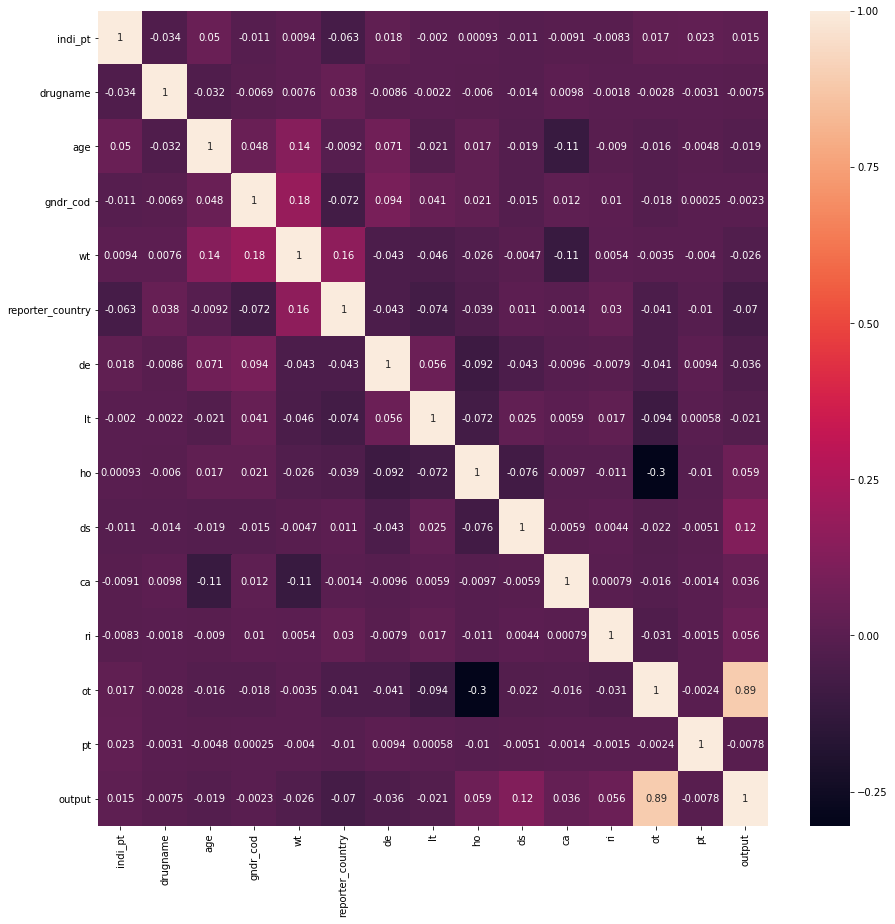

In [14]:
plt.figure(figsize=(15,15))
sns.heatmap(df3.corr(), annot=True)

In [35]:
# Looking at all correlations sorted
df3.corr().abs().unstack().sort_values(ascending=False).drop_duplicates()

output            output              1.000000
ot                output              0.891692
ho                ot                  0.304724
wt                gndr_cod            0.184669
reporter_country  wt                  0.162513
wt                age                 0.138292
ds                output              0.121850
ca                age                 0.110744
wt                ca                  0.108415
gndr_cod          de                  0.094010
ot                lt                  0.093846
de                ho                  0.092016
ds                ho                  0.076076
lt                reporter_country    0.073980
gndr_cod          reporter_country    0.072479
ho                lt                  0.071921
age               de                  0.071416
reporter_country  output              0.070004
                  indi_pt             0.062561
ho                output              0.059073
lt                de                  0.055743
output       

In [15]:
# Correlation of reactions
df3.corr().abs()['pt'].sort_values(ascending=False)

pt                  1.000000
indi_pt             0.023471
ho                  0.010357
reporter_country    0.010133
de                  0.009386
output              0.007836
ds                  0.005109
age                 0.004820
wt                  0.003991
drugname            0.003133
ot                  0.002413
ri                  0.001479
ca                  0.001397
lt                  0.000577
gndr_cod            0.000249
Name: pt, dtype: float64

In [16]:
# Correlation of drugs
df3.corr().abs()['drugname'].sort_values(ascending=False)

drugname            1.000000
reporter_country    0.037868
indi_pt             0.034063
age                 0.031690
ds                  0.013500
ca                  0.009760
de                  0.008594
wt                  0.007553
output              0.007509
gndr_cod            0.006864
ho                  0.006040
pt                  0.003133
ot                  0.002849
lt                  0.002193
ri                  0.001782
Name: drugname, dtype: float64

Text(0.5,1,'Selecting k with the Elbow Method')

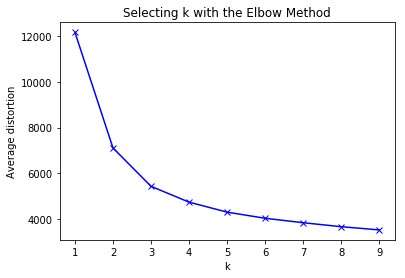

In [74]:
# Clustering to see pattaerns of drugs, age, wt, reactions, ... wihtout outcomes
del(X)
df_n=df3.drop(['output','de','ds','ca','ri','ot','ho','lt','cluster'], axis=1)
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist 
X=df_n
K = range(1, 10) 

meandistortions = []

for k in K: 
    kmeans = KMeans(n_clusters=k) 
    kmeans.fit(X) 
    meandistortions.append(sum(np.min(cdist(X, kmeans.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0]) 

plt.plot(K, meandistortions, 'bx-') 
plt.xlabel('k') 
plt.ylabel('Average distortion') 
plt.title('Selecting k with the Elbow Method') 

Text(0.5,1,'Selecting k with the Elbow Method')

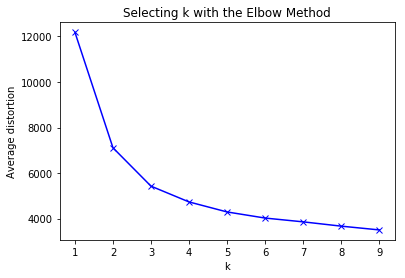

In [29]:
# Clustering to see pattaerns of drugs, age, wt, reactions, outcomes
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist 
X=df3
K = range(1, 10) 

meandistortions = []

for k in K: 
    kmeans = KMeans(n_clusters=k) 
    kmeans.fit(X) 
    meandistortions.append(sum(np.min(cdist(X, kmeans.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0]) 

plt.plot(K, meandistortions, 'bx-') 
plt.xlabel('k') 
plt.ylabel('Average distortion') 
plt.title('Selecting k with the Elbow Method') 

In [16]:
from sklearn.cluster import KMeans
k_means = KMeans(init='k-means++', n_clusters=3, random_state=0)
k_means.fit(df3)
df3_cl = pd.DataFrame(k_means.labels_, columns = ['cluster'])
df3 = df3.join(df3_cl)
df3.head()

,indi_pt,drugname,age,gndr_cod,wt,reporter_country,de,lt,ho,ds,ca,ri,ot,pt,output,cluster
53,4714,30356,79.67,0.0,61.0,51,0,0,0,0,0,0,1,55,7.0,2.0
54,4714,30356,79.67,0.0,61.0,51,0,0,0,0,0,0,1,1449,7.0,2.0
55,4714,30356,79.67,0.0,61.0,51,0,0,0,0,0,0,1,3248,7.0,2.0
56,4714,30356,79.67,0.0,61.0,51,0,0,0,0,0,0,1,8403,7.0,2.0
57,4714,30356,79.67,0.0,61.0,51,0,0,0,0,0,0,1,11464,7.0,2.0


In [17]:
df3['cluster'].value_counts()

1.0    75955
2.0    72312
0.0    61043
Name: cluster, dtype: int64

In [18]:
df3_cl0=df3[df3['cluster']==0]
df3_cl0=df3_cl0.drop(['cluster'], axis=1)
df3_cl1=df3[df3['cluster']==1]
df3_cl1=df3_cl1.drop(['cluster'], axis=1)
df3_cl2=df3[df3['cluster']==2]
df3_cl2=df3_cl2.drop(['cluster'], axis=1)

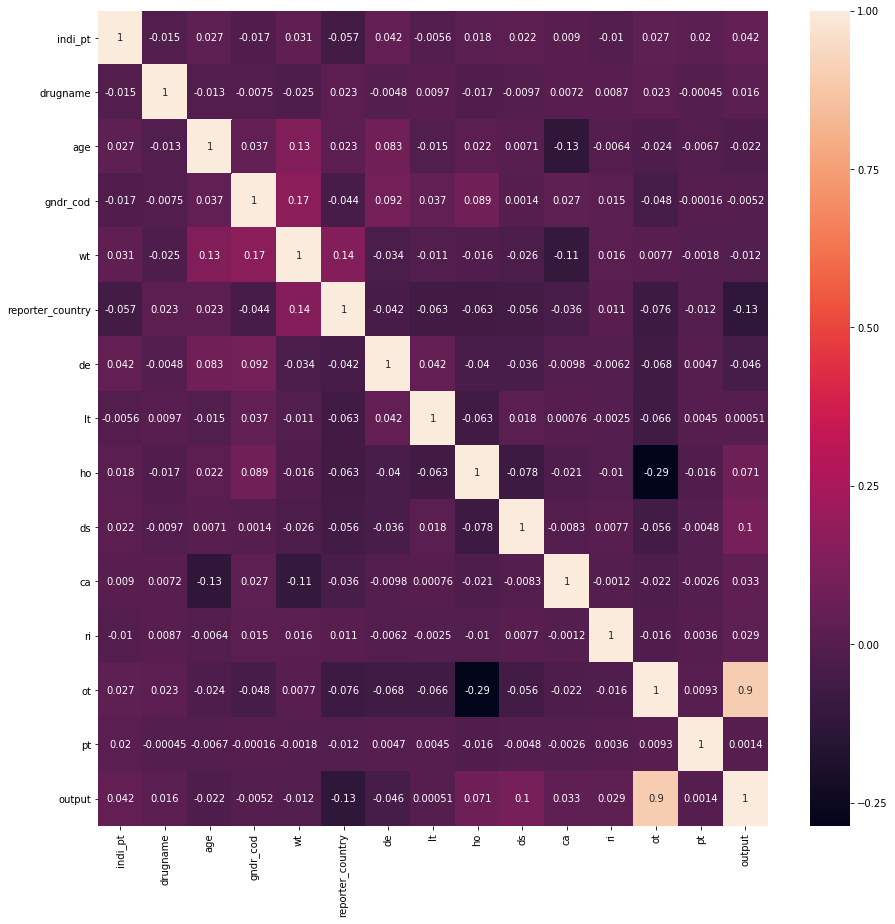

In [19]:
plt.figure(figsize=(15,15))
sns.heatmap(df3_cl0.corr(), annot=True)

In [22]:
y=df3_cl0['output']
X=df3_cl0.drop(['output','de','lt','ho','ds','ca','ri','ot'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0, stratify=y)
dt= DecisionTreeClassifier(class_weight='balanced')
dt.fit(X_train, y_train)
print metrics.accuracy_score(y_test, dt.predict(X_test))

print metrics.confusion_matrix(y_test, dt.predict(X_test))

0.7903357903357904
[[1914   24   13  199   25    1    0  205]
 [  19  121    3   20    0    0    0   14]
 [  17    7  126   10    2    0    0   10]
 [ 192   15    8 1112   13    0    0  102]
 [  15    1    2   11  143    0    0   14]
 [   0    0    0    0    0    8    0    3]
 [   2    0    0    1    0    0    1    0]
 [ 180   13   19  107   12    1    0 1400]]


In [67]:
x1=np.append(X_train,X_test,axis=0)
y1=np.append(y_train,y_test,axis=0)
dt_2= DecisionTreeClassifier(class_weight='balanced')
#dt_2.fit(X, y)
scores = cross_val_score(dt_2, x1, y1, scoring='accuracy', cv=10)
print scores
print scores.mean()

[0.80615586 0.79924677 0.78922371 0.7807075  0.80209699 0.79390564
 0.76720183 0.80317929 0.79301868 0.78836066]
0.7923096922081526


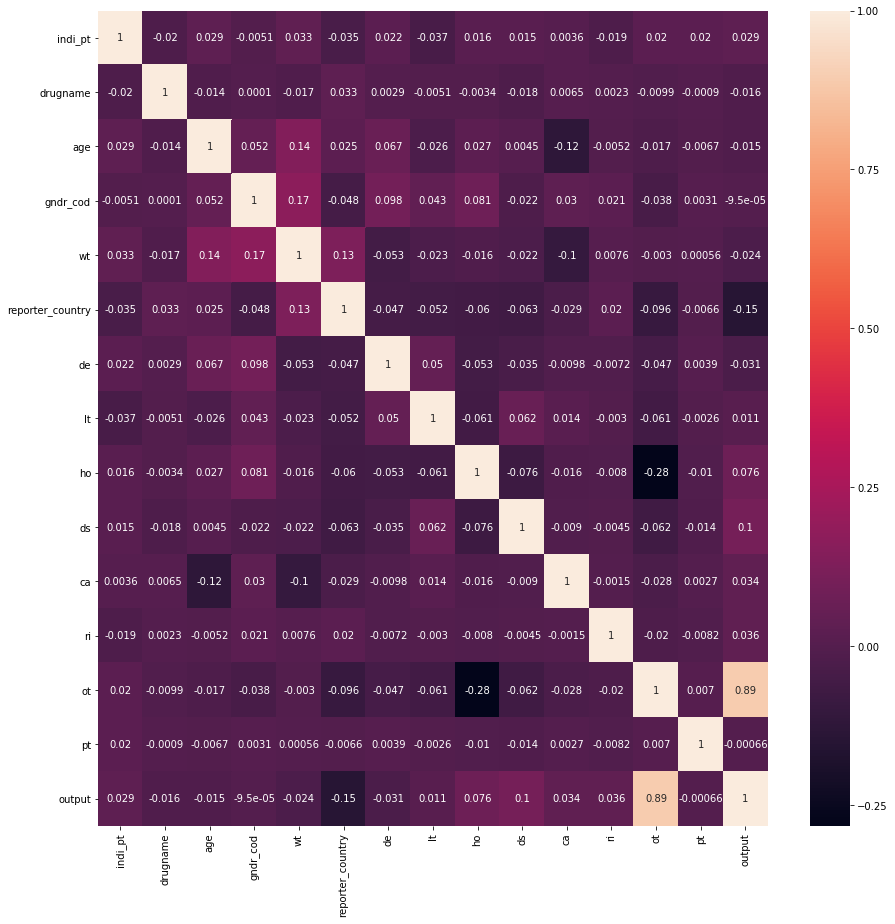

In [23]:
plt.figure(figsize=(15,15))
sns.heatmap(df3_cl1.corr(), annot=True)

In [24]:
y=df3_cl1['output']
X=df3_cl1.drop(['output','de','lt','ho','ds','ca','ri','ot'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0, stratify=y)
dt= DecisionTreeClassifier(class_weight='balanced')
dt.fit(X_train, y_train)
print metrics.accuracy_score(y_test, dt.predict(X_test))

print metrics.confusion_matrix(y_test, dt.predict(X_test))

0.7935755660874144
[[2429   34   23  225   22    0    0  277]
 [  25  126    4   19    1    0    0   20]
 [  23    2  150   10    2    0    0   13]
 [ 195   18   14 1407   13    1    0  138]
 [  18    2    1    7  202    0    0   10]
 [   2    0    0    0    0   14    0    0]
 [   3    0    0    0    0    0    6    0]
 [ 256   22   14  137   16    0    1 1694]]


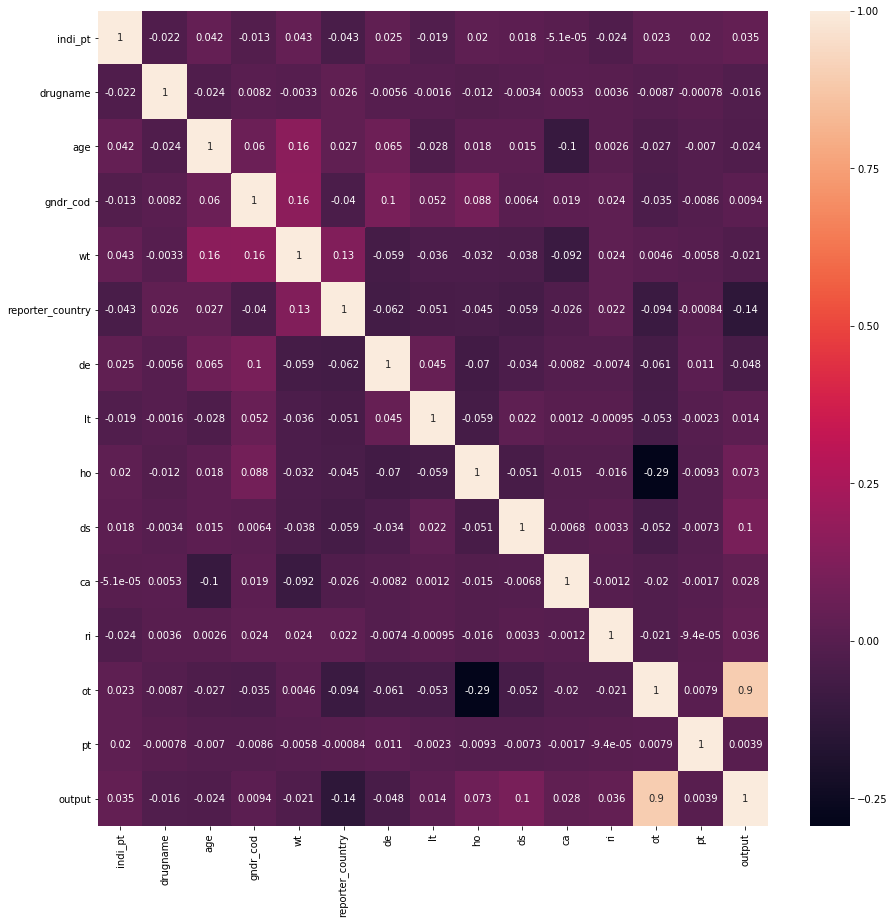

In [25]:
plt.figure(figsize=(15,15))
sns.heatmap(df3_cl2.corr(), annot=True)

In [26]:
y=df3_cl2['output']
X=df3_cl2.drop(['output','de','lt','ho','ds','ca','ri','ot'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0, stratify=y)
dt= DecisionTreeClassifier(class_weight='balanced')
dt.fit(X_train, y_train)
print metrics.accuracy_score(y_test, dt.predict(X_test))

print metrics.confusion_matrix(y_test, dt.predict(X_test))

0.7848451327433629
[[2268   22   15  245   18    0    4  265]
 [  18  168    1   14    0    0    0   14]
 [  16    0  156   15    0    0    0   15]
 [ 218   25   18 1313    7    0    1  145]
 [  18    0    1    8  149    0    0   22]
 [   0    0    0    0    0    9    0    1]
 [   2    0    0    1    1    0    3    1]
 [ 246   17   13  132   15    2    0 1610]]


In [47]:
# An attempt to predict the limited number of reactions without using output
ind=pd.DataFrame(df3_cl2['pt'].value_counts().sort_values(ascending=False).head(500)).index
df3_cl2_limit=df3_cl2[df3_cl2.pt.isin(ind)]
y=df3_cl2_limit['pt']
X=df3_cl2_limit.drop(['output','de','lt','ho','ds','ca','ri','ot','pt'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0, stratify=y)
dt= DecisionTreeClassifier(class_weight='balanced')
dt.fit(X_train, y_train)
print metrics.accuracy_score(y_test, dt.predict(X_test))

0.1233956729006234


In [38]:
#import decisiontreeclassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
#import logisticregression classifier
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
#import knn classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

#for validating your classification model
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

# feature selection
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [39]:
df4=df3.sample(2000000)

In [41]:
y=df4['de']
X=df4.drop(['output','de','lt','ho','ds','ca','ri','ot'], axis=1)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
dt= DecisionTreeClassifier(class_weight='balanced')
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [43]:
print metrics.accuracy_score(y_test, dt.predict(X_test))

print metrics.confusion_matrix(y_test, dt.predict(X_test))

0.9682566666666667
[[553079   9569]
 [  9477  27875]]


In [44]:
pd.DataFrame({'feature':X.columns, 'dt_importance':dt.feature_importances_})

,dt_importance,feature
0,0.153465,indi_pt
1,0.128037,drugname
2,0.232517,age
3,0.035806,gndr_cod
4,0.273278,wt
5,0.099792,reporter_country
6,0.077106,pt


In [ ]:
from sklearn.externals.six import StringIO
import pydotplus

dot_data = StringIO() 
tree.export_graphviz(dt, out_file=dot_data, feature_names=X.columns,
                     filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_pdf("dt.pdf")

In [45]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=50,class_weight='balanced')    #building 50 decision trees
clf=clf.fit(X, y)
clf.score(X,y)

0.9972815

In [46]:
scores = cross_val_score(clf, X, y, scoring='accuracy', cv=5)
print scores
print scores.mean()

[0.97050257 0.97043507 0.971185   0.96974242 0.97025993]
0.9704249995323512


In [51]:
pd.DataFrame({'feature':X.columns, 'RF_importance':clf.feature_importances_})

,RF_importance,feature
0,0.149500,indi_pt
1,0.169923,drugname
2,0.236720,age
3,0.007225,gndr_cod
4,0.268988,wt
5,0.050934,reporter_country
6,0.116710,pt


In [31]:
knn= KNeighborsClassifier()
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [32]:
scores = cross_val_score(knn, X, y, scoring='accuracy', cv=5)
print scores
print scores.mean()

[0.37167942 0.37131314 0.37082315 0.37354687 0.37303246]
0.3720790085021466


C:\ProgramData\Anaconda2\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


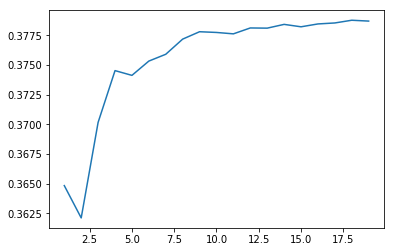

In [33]:
# Finding best K
from sklearn.grid_search import GridSearchCV

knn = KNeighborsClassifier()
k_range = range(1, 20)
param_grid = dict(n_neighbors=k_range)
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
grid.fit(X, y)

# check the results of the grid search
grid.grid_scores_
grid_mean_scores = [result[1] for result in grid.grid_scores_]
plt.figure()
plt.plot(k_range, grid_mean_scores)
plt.show()

In [34]:
print grid.best_score_
print grid.best_params_
print grid.best_estimator_

0.378784
{'n_neighbors': 18}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=18, p=2,
           weights='uniform')


In [38]:
knn= KNeighborsClassifier(n_neighbors=18, weights='uniform')
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=18, p=2,
           weights='uniform')

In [36]:
scores = cross_val_score(knn, X, y, scoring='accuracy', cv=5)
print scores
print scores.mean()

[0.37629436 0.37776311 0.37699312 0.37775189 0.37648753]
0.3770580000627147


In [ ]:
# Create support vector classifier
svc = svm.SVC(kernel='linear', class_weight='balanced', C=1.0, random_state=0)

clf = OneVsRestClassifier(SVC(kernel='linear', probability=True, class_weight='balanced'), n_jobs=-1)
clf.fit(X, y)

svc.fit(X_train, y_train)
print metrics.accuracy_score(y_test, svc.predict(X_test))
print metrics.confusion_matrix(y_test, svc.predict(X_test))

## Analysis on Reactions

In [48]:
df.pt.value_counts().sort_values(ascending=False)

no reaction                               1611256
drug ineffective                           258086
nausea                                     244350
fatigue                                    217537
diarrhoea                                  199608
dyspnoea                                   193968
pain                                       179290
headache                                   178598
vomiting                                   161993
dizziness                                  159524
pyrexia                                    146480
malaise                                    136864
asthenia                                   134561
pneumonia                                  130916
fall                                       130609
arthralgia                                 117500
off label use                              113283
anaemia                                    109691
anxiety                                    109150
pain in extremity                          105291


In [22]:
#Drugs in indications that do not work!
df_r1=df[df['pt']=='drug ineffective']
df_r1.groupby(['indi_pt','drugname'])['ds'].count().reset_index().sort_values(['ds'], ascending=False)

,indi_pt,drugname,ds
30734,skin wrinkling,botox cosmetic,1931
29332,rheumatoid arthritis,enbrel,1740
29359,rheumatoid arthritis,humira,1252
7711,crohn's disease,humira,866
18234,multiple sclerosis,tysabri,818
12002,gastrooesophageal reflux disease,nexium,677
10817,erectile dysfunction,viagra,570
28253,psoriasis,enbrel,544
28264,psoriasis,humira,500
24410,product used for unknown indication,enbrel,480


In [23]:
df_r2=df[df['pt']=='insomnia']
df_r3=df[df['pt']=='anaemia']

In [25]:
df_r2['drugname'].value_counts().sort_values(ascending=False)

seroquel                                         1244
cymbalta                                          986
lyrica                                            759
chantix                                           547
fosamax                                           481
xyrem                                             439
humira                                            404
pegasys                                           403
enbrel                                            402
avonex                                            340
ampyra                                            332
nexium                                            304
seroquel xr                                       303
xanax                                             284
synthroid                                         271
tysabri                                           270
vioxx                                             259
lunesta                                           250
zoloft                      

In [49]:
df3.head()

,indi_pt,drugname,age,gndr_cod,wt,reporter_country,de,lt,ho,ds,ca,ri,ot,pt,output,cluster
53,4714,30356,79.67,0.0,61.0,51,0,0,0,0,0,0,1,55,7.0,2.0
54,4714,30356,79.67,0.0,61.0,51,0,0,0,0,0,0,1,1449,7.0,2.0
55,4714,30356,79.67,0.0,61.0,51,0,0,0,0,0,0,1,3248,7.0,2.0
56,4714,30356,79.67,0.0,61.0,51,0,0,0,0,0,0,1,8403,7.0,2.0
57,4714,30356,79.67,0.0,61.0,51,0,0,0,0,0,0,1,11464,7.0,2.0


In [50]:
df3.pt.value_counts()

7412     91283
7220     26477
3248     21044
3491     20504
3381     20361
4089     20313
7845     20252
11403    17603
4829     17574
3330     17142
9059     16255
8441     15506
6508     14400
964      13775
11464    13167
4058     12798
474      12322
909      12224
7846     11875
726      11846
5738     11678
3120     10754
55       10725
7595     10243
5240      9866
2340      9798
1080      9640
3048      9388
9111      9339
2861      9041
         ...  
4200         1
247          1
1884         1
628          1
9315         1
4345         1
5741         1
8809         1
8036         1
5743         1
6765         1
3695         1
4717         1
10491        1
9313         1
5988         1
1125         1
3324         1
5984         1
4351         1
2916         1
8820         1
5746         1
1276         1
6770         1
5744         1
3175         1
4721         1
10494        1
0            1
Name: pt, Length: 11552, dtype: int64

In [51]:
# An attempt to predict the limited number of reactions without using output
ind=pd.DataFrame(df3['pt'].value_counts().sort_values(ascending=False).head(500)).index
df3_limit=df3[df3.pt.isin(ind)]
y=df3_limit['pt']
X=df3_limit.drop(['output','de','lt','ho','ds','ca','ri','ot','pt','cluster'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0, stratify=y)
dt= DecisionTreeClassifier(class_weight='balanced')
dt.fit(X_train, y_train)
print metrics.accuracy_score(y_test, dt.predict(X_test))

0.09601384413414489


In [58]:
lb.inverse_transform(df3.pt)

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


array(['abdominal pain', 'blood creatinine increased', 'diarrhoea', ...,
       'pneumonia', 'pneumonia', 'hypertriglyceridaemia'], dtype=object)

In [62]:
lb.inverse_transform([7220,3248])

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


array(['nausea', 'diarrhoea'], dtype=object)

## Sequence of drugs

In [63]:
df.head()

,primaryid,drug_seq,caseid,indi_pt,drugname,age,gndr_cod,wt,reporter_country,de,lt,ho,ds,ca,ri,ot,pt,output
0,100033001,1,10003300.0,osteoporosis,boniva,77.0,0.0,NaN,us,0,0,0,1,0,0,0,arthralgia,4.0
1,100033001,1,10003300.0,osteoporosis,boniva,77.0,0.0,NaN,us,0,0,0,1,0,0,0,headache,4.0
2,100033061,1,10003306.0,product used for unknown indication,NaN,68.0,0.0,NaN,us,0,0,0,0,0,0,0,cough,0.0
3,100033062,1,10003306.0,product used for unknown indication,letairis,68.0,0.0,NaN,us,0,0,0,0,0,0,0,cough,0.0
4,100033072,2,10003307.0,connective tissue disorder,letairis,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,rhinorrhoea,0.0


In [69]:
df[df['drugname']=='letairis'].groupby(['pt'])['primaryid'].count().reset_index().sort_values(['primaryid'], ascending=False)

,pt,primaryid
1057,no reaction,6276
478,dyspnoea,1813
675,headache,695
447,dizziness,654
577,fluid retention,580
1073,oedema peripheral,548
1026,nasal congestion,493
1072,oedema,493
558,fatigue,474
944,malaise,450


In [ ]:
# Make a predictive model for some part of reactions
# Testing the predictive model on a new dataset from FDA
# Categorical dataset and correlation! Maybe get 100 most frequent and then make them 0,1 and then correlation!
# Cleaning drugnames...
# correcting the outcome predictive model.. It categorical is wrong!
# predictrive model on outcomes.. make them into 0,1 for all columns..and then make a predictive model on each!